# Dynamic Pricing Prediction for Cabs using Machine Learning Algorithms

In [175]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [176]:
# reading csv /datset files 
rides_df = pd.read_csv('cab_rides.csv')
weather_df = pd.read_csv('weather.csv')

In [177]:
rides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [178]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [179]:
#printing weaather dataset 
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [180]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


# Data Visualization

In [181]:
cab_df = rides_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name']]

cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


We see that time_stamp is Unix, so we need to convert it to the readable form. Using the time_stamp column, lets convert it to date, week day, hour and time of day.

We calculate time of day into: Morning, Afternoon, Evening and Night

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
cab_df["rounded_timestamp"] = cab_df["time_stamp"] / 1000
cab_df["rounded_timestamp"] = cab_df["rounded_timestamp"].apply(np.floor)

cab_df["date"] = cab_df["rounded_timestamp"].apply(lambda x : datetime.fromtimestamp(x).date())
cab_df["time"] = cab_df["rounded_timestamp"].apply(lambda x: datetime.fromtimestamp(x).time())
cab_df['weekday'] = cab_df['date'].apply(lambda x: x.weekday())
cab_df["weekday"] = cab_df["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
cab_df['hour'] = cab_df['time'].apply(lambda time: time.hour)

cab_df.loc[(cab_df.hour >= 6) & (cab_df.hour < 12) , 'time_of_day'] = 'Morning'
cab_df.loc[(cab_df.hour >= 12) & (cab_df.hour < 15) , 'time_of_day'] = 'Afternoon'
cab_df.loc[(cab_df.hour >= 15) & (cab_df.hour < 18) , 'time_of_day'] = 'Evening'
cab_df.loc[(cab_df.hour >= 18) | (cab_df.hour < 6) , 'time_of_day'] = 'Night'

cab_df = cab_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]

In [184]:
cab_df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [185]:
uber_df = cab_df[cab_df['cab_type'] =="Uber"]
lyft_df = cab_df[cab_df['cab_type'] =="Lyft"]

To find the correlation, we need to pick up numeric values.

In [186]:
lyft_df = cab_df[cab_df["cab_type"] == "Lyft"]
uber_ds = cab_df[cab_df['cab_type'] == "Uber"]

uber_ds_corr = uber_ds[["distance", "price", "surge_multiplier"]]
lyft_df_corr = lyft_df[["distance", "price", "surge_multiplier"]]

<AxesSubplot:>

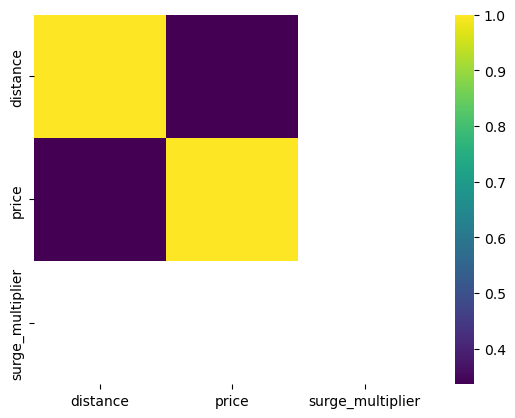

In [187]:
sns.heatmap(uber_ds_corr.corr(), cmap="viridis")

<AxesSubplot:>

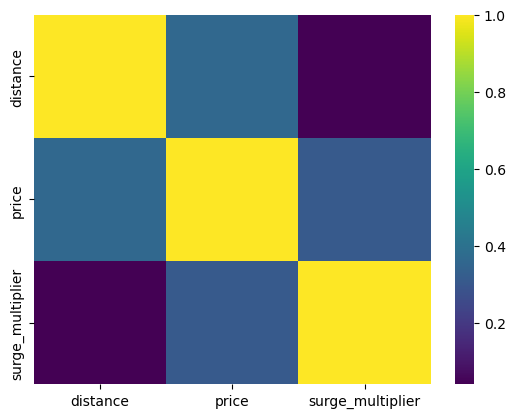

In [188]:
sns.heatmap(lyft_df_corr.corr() , cmap="viridis")

From above we learn:

For lyft: Surge Multiplier and Distance are weakly correlated
For lyft: Surge Multiplier and Price are more correlated than above pair
For Uber: Price and Distance are weakly correlated

# Surge and Day of Week


First we see the value counts for the Uber and Lyft

In [189]:
uber_df["surge_multiplier"].value_counts()
lyft_df["surge_multiplier"].value_counts()

1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

From above we see that for Uber we have only one value of surge multiplier

So we consider the surge multiplier for Lyft only and plot which day it is highest. We only consider the surge multiplier > 1.

Text(0.5, 1.0, 'Weekday wise Surge')

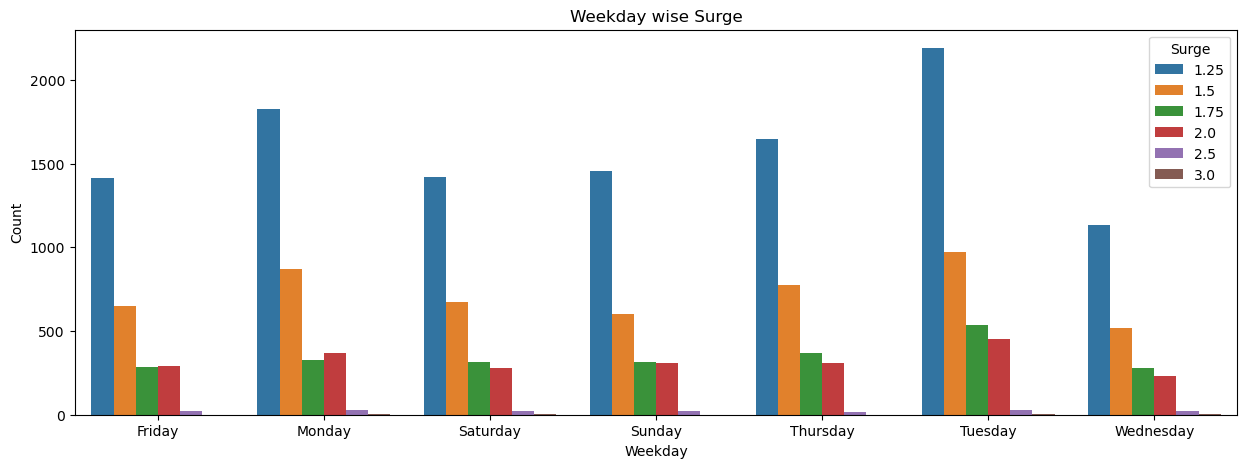

In [190]:
high_surge_dataset = lyft_df[lyft_df["surge_multiplier"]> 1]
t_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["Weekday", "Surge", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title("Weekday wise Surge")

We learn that

Surge 1.25 is happening most. Tuesday is the day when you are most likely to encounter it and Wednesday is the day when its most unlikely.
3.0 is very unlikely to happen

# Surge and Time of Day

Text(0.5, 1.0, 'Time of Day wise Surge')

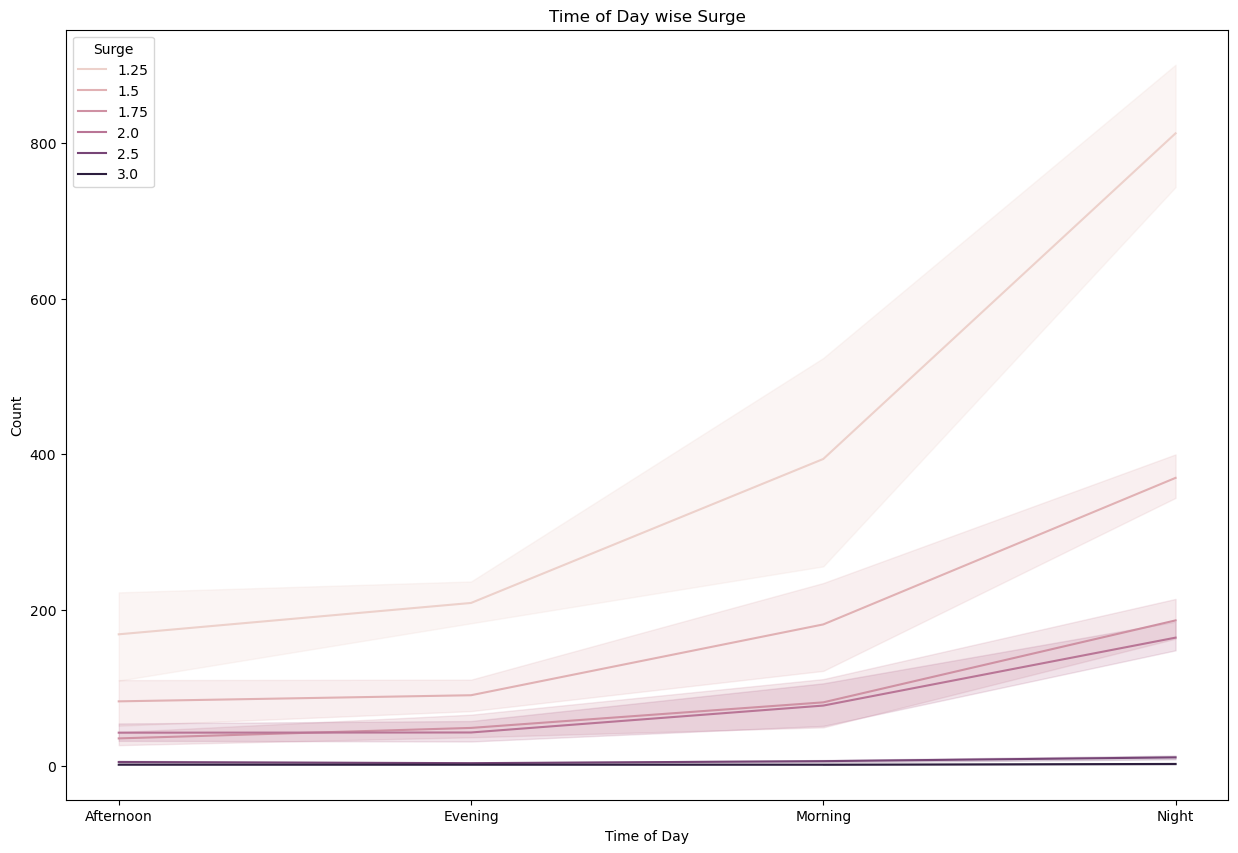

In [191]:
td_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier","time_of_day"]).size().reset_index())
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]

plt.figure(figsize=(15, 10))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title("Time of Day wise Surge")

Night sees the most Surge
Afternoon and Evening the least
Morning also witnesses surge maybe because of school or busineeses

# Surge and Distance

Text(0.5, 1.0, 'Uber - Distance Vs Price')

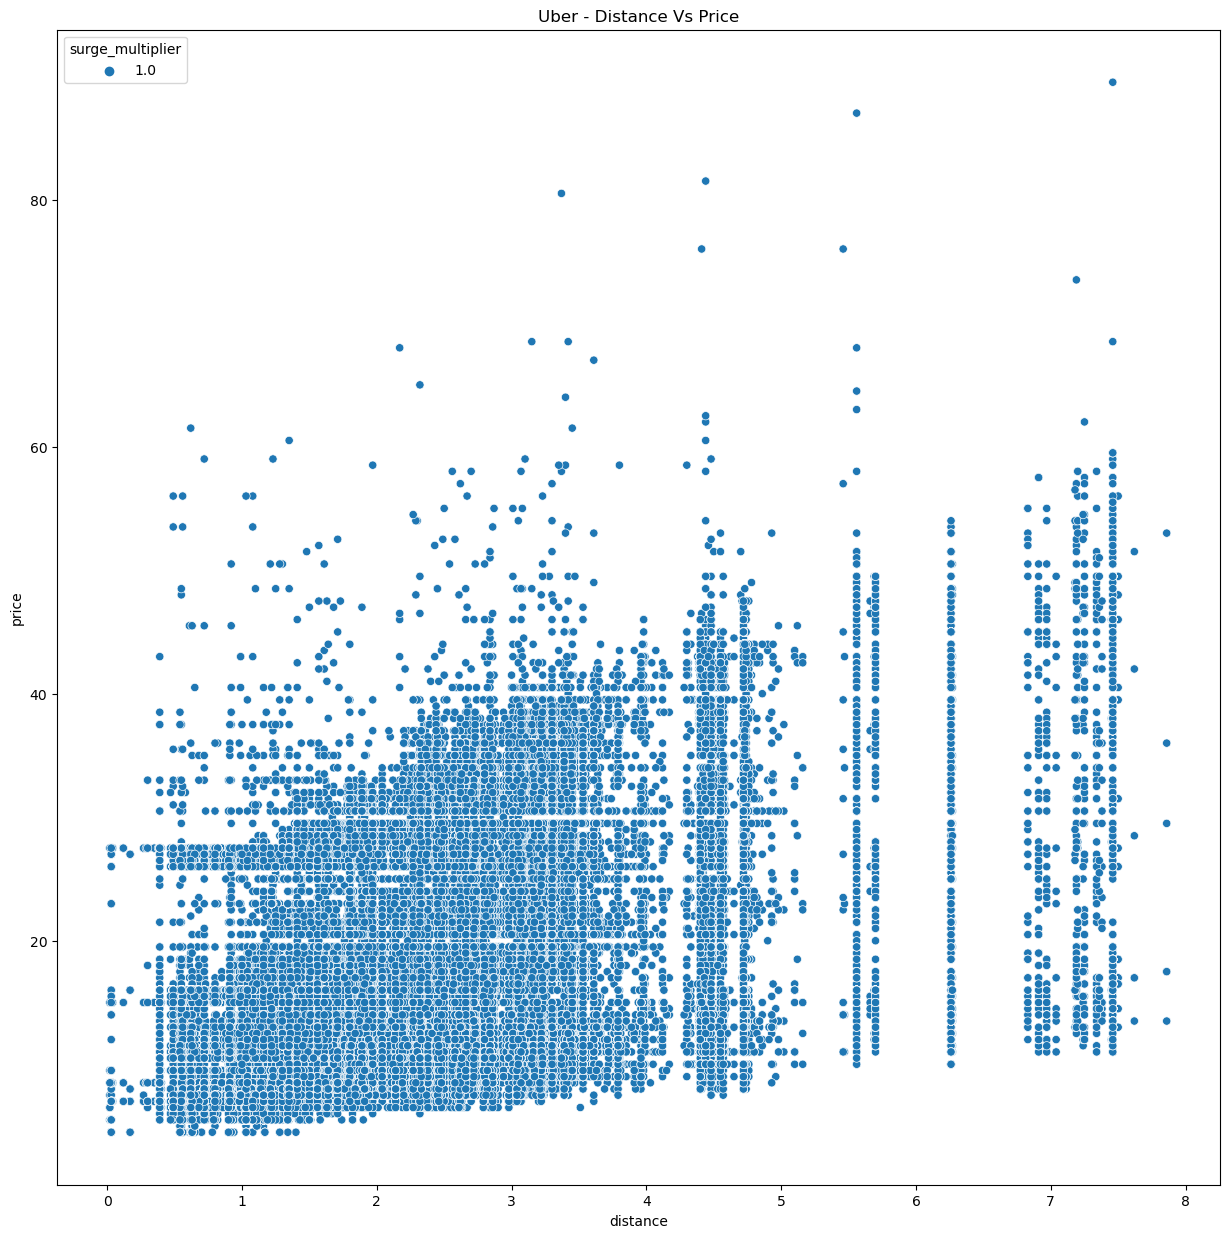

In [192]:
uber_dis_price_surge = uber_df[['distance', 'surge_multiplier', 'price']]
lyft_dis_price_surge = lyft_df[['distance', 'surge_multiplier', 'price']]
plt.figure(figsize=(15, 15))
sns.scatterplot(data=uber_dis_price_surge, x="distance", y="price", hue="surge_multiplier").set_title("Uber - Distance Vs Price")

Now, from above we learn that distance and price are not strongly correlated. As the distance increases, price does not increase linearly

Text(0.5, 1.0, 'Lyft - Distance Vs Price')

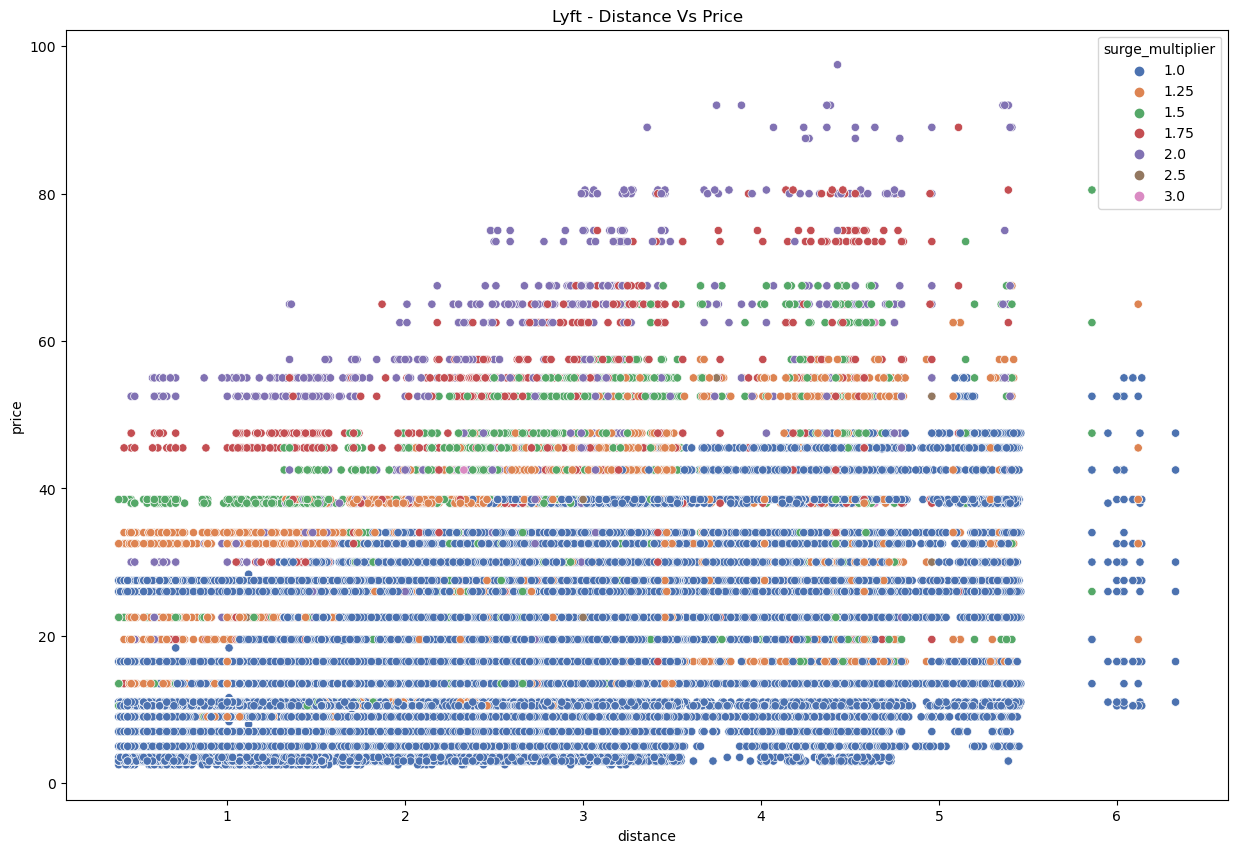

In [193]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=lyft_dis_price_surge, x="distance", y="price", hue="surge_multiplier", palette="deep").set_title("Lyft - Distance Vs Price")

So as the distance increases, price increases. We also see that with higher prices, more surge multiplier increases

# Top 5 Source destinations For Uber

In [194]:
uber_s_d_df= uber_df.groupby(['source', "destination"]).size().reset_index()
uber_s_d_df.columns = ["source", "destination", "count"]
uber_s_d_df.sort_values("count", inplace=True, ascending = False)
uber_five_most = uber_s_d_df.iloc[0:5, ]
uber_five_most["Source - Destination"] = uber_s_d_df["source"] + " - " + uber_s_d_df["destination"]

# So the top five most Source - Destination for Uber
uber_five_most = uber_five_most[["Source - Destination", "count"]]
uber_five_most

,Source - Destination,count
29,Financial District - South Station,5726
56,South Station - Financial District,5726
36,North End - Back Bay,5677
3,Back Bay - North End,5677
67,West End - Fenway,5635


# For Lyft

In [195]:
lyft_s_d_df= lyft_df.groupby(['source', "destination"]).size().reset_index()
lyft_s_d_df.columns = ["source", "destination", "count"]
lyft_s_d_df.sort_values("count", inplace=True, ascending = False)
lyft_five_most = lyft_s_d_df.iloc[0:5, ]
lyft_five_most["Source - Destination"] = lyft_s_d_df["source"] + " - " + lyft_s_d_df["destination"]

# So the top five most Source - Destination for lyft
lyft_five_most = lyft_five_most[["Source - Destination", "count"]]
lyft_five_most

,Source - Destination,count
56,South Station - Financial District,4626
29,Financial District - South Station,4626
36,North End - Back Bay,4548
3,Back Bay - North End,4548
67,West End - Fenway,4530


Which destinations attract more surge and which are least

Here we pick only those rows which have surge greater than or equal to 2

In [196]:
high_surge_rows = cab_df[cab_df["surge_multiplier"] >= 2]
loc_wise_surge = high_surge_rows.groupby(["source", "destination"]).size().reset_index()

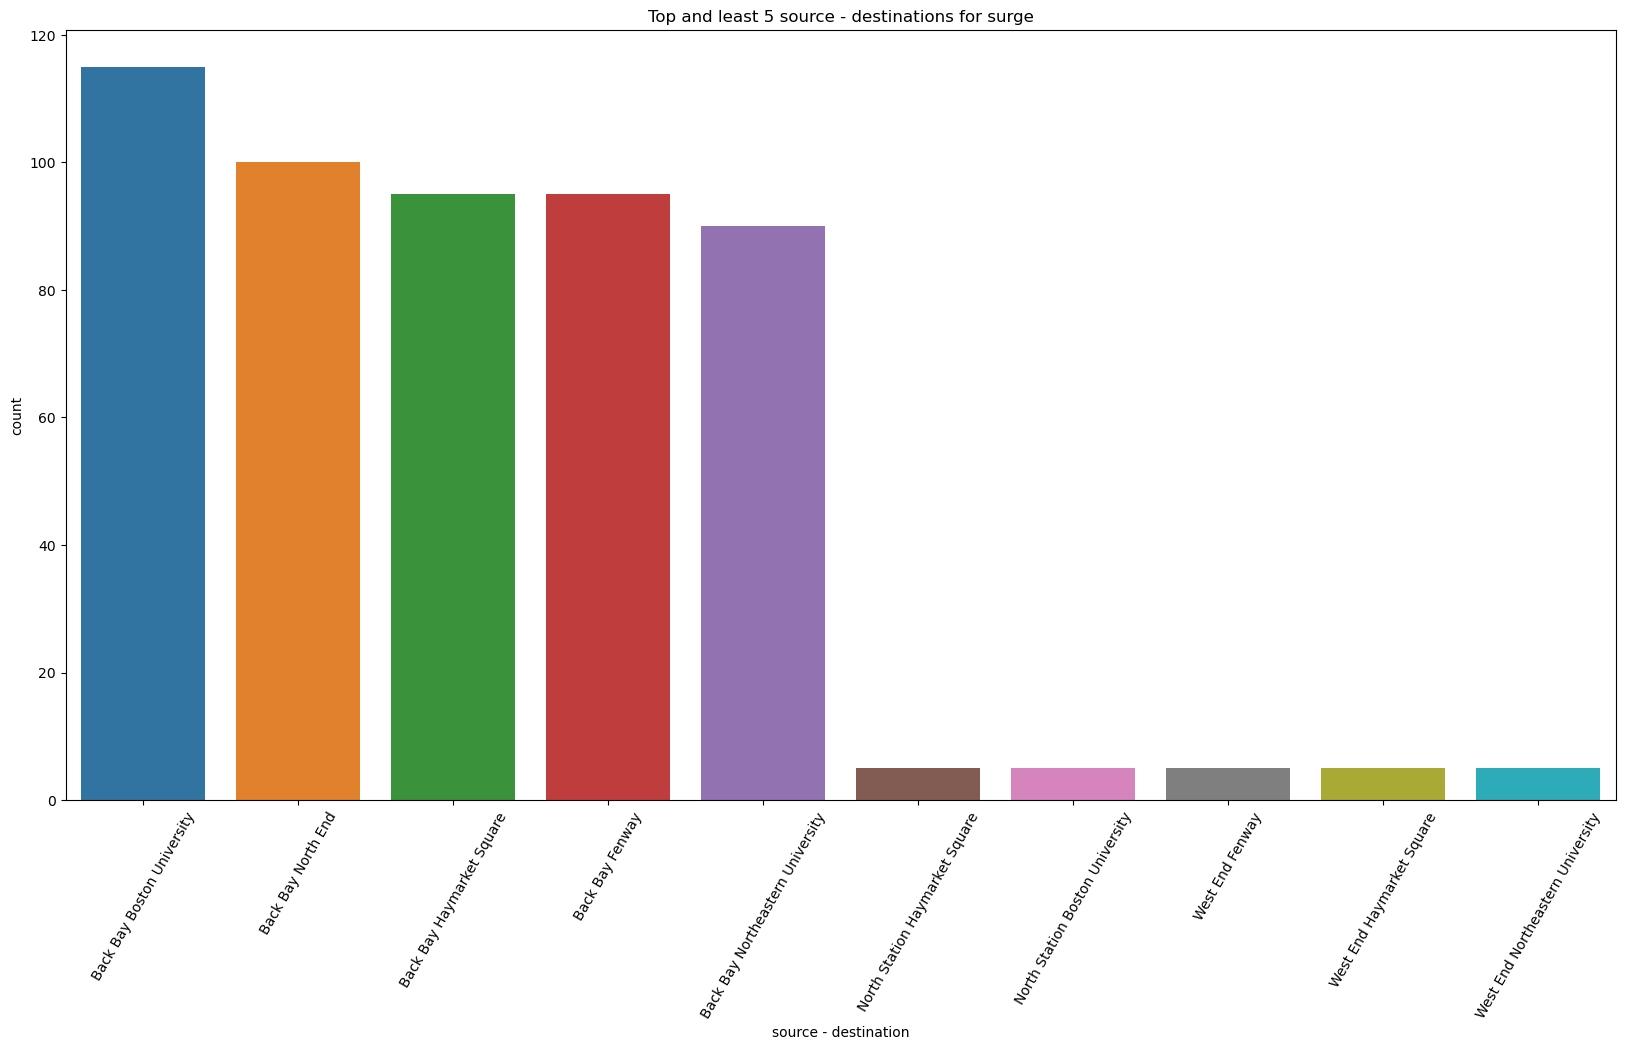

In [197]:
loc_wise_surge.columns=["source", "destination", "count"]
loc_wise_surge.sort_values(inplace=True, ascending=False, by=["count"])


highest_destination_surge = loc_wise_surge.head(5)
lowest_destination_surge = loc_wise_surge.tail(5)
# highest_destination_surge
destination_surge_df = highest_destination_surge.append(lowest_destination_surge, ignore_index=True)
destination_surge_df["source - destination"] = destination_surge_df["source"] + " " + destination_surge_df["destination"]
plt.figure(figsize=(20, 10))
g = sns.barplot(data = destination_surge_df, x = "source - destination", y = "count")
g.set_title("Top and least 5 source - destinations for surge")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=60);

# Shared Rides

In the Lyft rides, we can see that there are some shared rides as well.

Now, lets see when do people want to have these

In [198]:
lyft_df["name"].value_counts()

Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

# Shared Rides with Time of Day

Text(0.5, 1.0, 'Shared Rides wrt Time of Day')

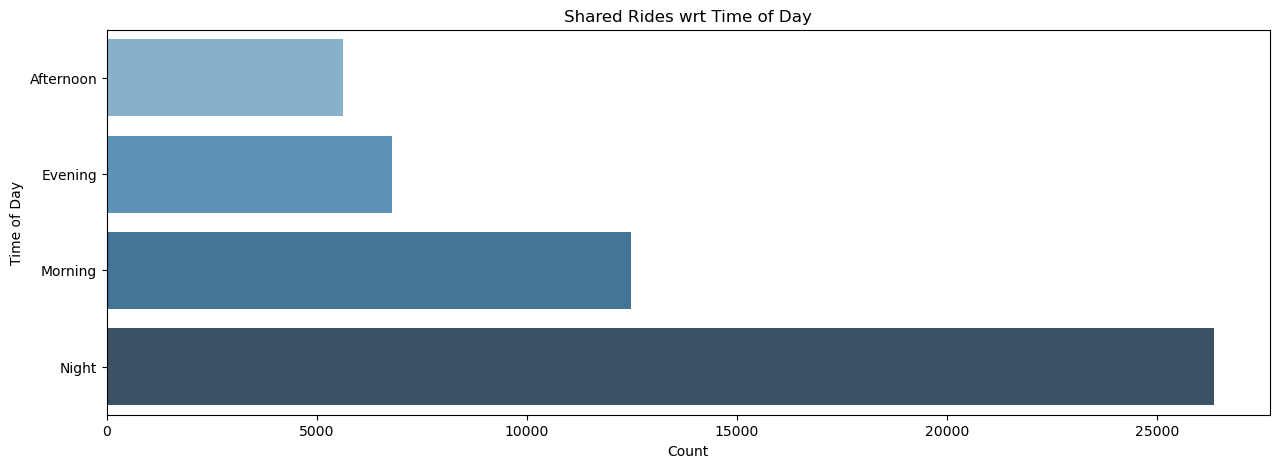

In [199]:
lyft_shared_rides_df = lyft_df[lyft_df["name"] == "Shared"]
lyft_shared_ride_td = lyft_shared_rides_df.groupby(["name", "time_of_day"]).size().reset_index()
lyft_shared_ride_td.columns = ["Name", "Time of Day", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(y="Time of Day", x="Count", data=lyft_shared_ride_td, palette="Blues_d", orient ='h' ).set_title("Shared Rides wrt Time of Day")

So people are more preferring to have shared rides during the night than any other time of the day. This might be due to the surge

# Shared rides with Distance and Price 

In [200]:
lyft_shared_rides_distance_price = lyft_shared_rides_df.groupby(["name", "distance", "price"]).size().reset_index()
lyft_shared_rides_distance_price.columns = ["name", "distance", "price", "count"]

In [201]:
lyft_shared_rides_distance_price

,name,distance,price,count
0,Shared,0.39,2.5,1
1,Shared,0.39,3.0,4
2,Shared,0.39,3.5,1
3,Shared,0.39,5.0,36
4,Shared,0.39,7.0,1
...,...,...,...,...
2778,Shared,6.12,10.5,1
2779,Shared,6.12,13.5,1
2780,Shared,6.13,11.0,1
2781,Shared,6.14,10.5,1


Text(0.5, 1.0, 'Lyft Rides - Distance vs Price - Count')

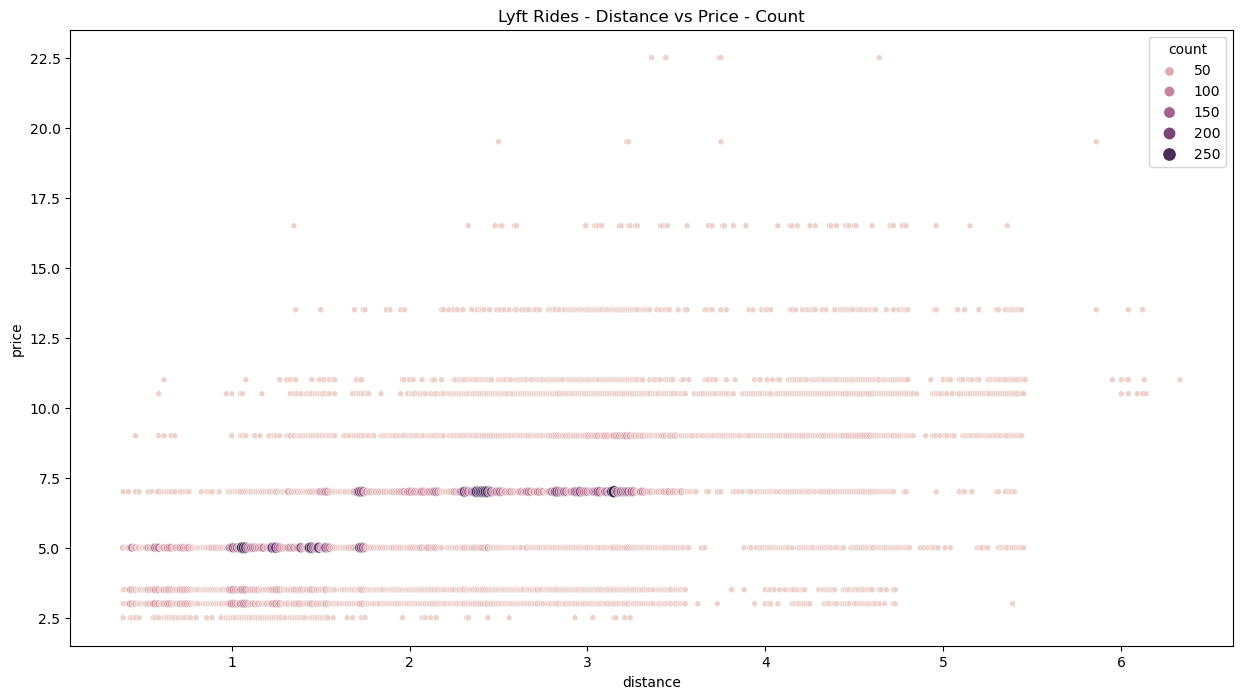

In [202]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = lyft_shared_rides_distance_price, x = "distance", y="price", hue="count", size="count").set_title("Lyft Rides - Distance vs Price - Count")

Now from above we can see as the distance increases, price tends to increase, however shared rides are not affected. People prefer taking shared rides over the courses of small rides, roughly lying between 1 to 3 kilometers.

# Cleaning Ride Data

In [203]:
# printing rides data 
rides_df


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [204]:
# Checking null values in rides dataset 
rides_df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [205]:
# dropping null values in the data set row wise
rides_df = rides_df.dropna(axis=0).reset_index(drop=True)
rides_df.isna().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [206]:
rides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


## Cleaning Weather Data

In [207]:
# printing weatther data 
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [208]:
# checking null values in weather data 
weather_df.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [209]:
# filling null values in weather data 
weather_df = weather_df.fillna(0)

## Creating Average Weather DataFrame

In [210]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.0000,1543819974,0.96,1.54


In [211]:
# Calculating the mean/Average value of each prperty location wise 
weather_df.groupby('location').mean()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
location,,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426


In [212]:
avg_weather_df = weather_df.groupby('location').mean().reset_index(drop=False)
avg_weather_df = avg_weather_df.drop('time_stamp', axis=1)
avg_weather_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


# Merging DataFrames

In [213]:
rides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [214]:
source_weather_df = avg_weather_df.rename(
    columns={
        'location': 'source',
        'temp': 'source_temp',
        'clouds': 'source_clouds',
        'pressure': 'source_pressure',
        'rain': 'source_rain',
        'humidity': 'source_humidity',
        'wind': 'source_wind'
    }
)

source_weather_df

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [215]:
# Merging both ride and weather data frame  
destination_weather_df = avg_weather_df.rename(
    columns={
        'location': 'destination',
        'temp': 'destination_temp',
        'clouds': 'destination_clouds',
        'pressure': 'destination_pressure',
        'rain': 'destination_rain',
        'humidity': 'destination_humidity',
        'wind': 'destination_wind'
    }
)

destination_weather_df

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [216]:
data = rides_df\
    .merge(source_weather_df, on='source')\
    .merge(destination_weather_df, on='destination')

data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


# Preprocessing

In [217]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop id column
    df = df.drop('id', axis=1)
    df = df.drop('product_id', axis=1)

    
    # Binary encode cab_type column
    df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    
    # One-hot encode remaining categorical columns
    for column, prefix in [('destination', "dest"), ('source', "src"), ('name', "nm")]:
        df = onehot_encode(df, column=column, prefix=prefix)
    
    # Split df into X and y
    y = df['price']
    X = df.drop('price', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    
    return X_train, X_test, y_train, y_test

In [218]:
# writing function for creating dummy variables with the help of one hot encoding 
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [219]:
# splitting our data into test and train 
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [220]:
X_train

,distance,cab_type,time_stamp,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
114027,1.16,1,1544771403522,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,...,0,0,0,0,0,0,0,0,0,0
597473,0.64,0,1544976311771,1.0,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,...,0,0,0,0,0,1,0,0,0,0
342796,2.44,0,1543597987042,1.0,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325,...,0,0,0,0,1,0,0,0,0,0
64532,1.24,0,1543864377074,1.0,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117,...,0,0,0,0,1,0,0,0,0,0
189601,2.40,0,1544870407679,1.0,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,3.30,1,1543742581790,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,...,0,0,0,0,0,0,0,1,0,0
491263,3.10,0,1544689506705,1.0,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,...,0,1,0,0,0,0,0,0,0,0
470924,4.48,1,1543691280749,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,...,0,0,0,0,0,0,0,0,0,1
491755,3.01,1,1544730904087,1.0,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,...,0,0,0,0,0,0,0,0,1,0


In [221]:
X_train.columns

Index(['distance', 'cab_type', 'time_stamp', 'surge_multiplier', 'source_temp',
       'source_clouds', 'source_pressure', 'source_rain', 'source_humidity',
       'source_wind', 'destination_temp', 'destination_clouds',
       'destination_pressure', 'destination_rain', 'destination_humidity',
       'destination_wind', 'dest_Back Bay', 'dest_Beacon Hill',
       'dest_Boston University', 'dest_Fenway', 'dest_Financial District',
       'dest_Haymarket Square', 'dest_North End', 'dest_North Station',
       'dest_Northeastern University', 'dest_South Station',
       'dest_Theatre District', 'dest_West End', 'src_Back Bay',
       'src_Beacon Hill', 'src_Boston University', 'src_Fenway',
       'src_Financial District', 'src_Haymarket Square', 'src_North End',
       'src_North Station', 'src_Northeastern University', 'src_South Station',
       'src_Theatre District', 'src_West End', 'nm_Black', 'nm_Black SUV',
       'nm_Lux', 'nm_Lux Black', 'nm_Lux Black XL', 'nm_Lyft', 'nm_Lyft X

In [222]:
y_train

114027    27.0
597473     5.0
342796    16.5
64532     13.5
189601    16.5
          ... 
371403    10.5
491263    27.5
470924    18.5
491755    16.5
128037    23.0
Name: price, Length: 446583, dtype: float64

# Training

### LinearRegression

In [223]:
# creating a model and fitting our traing data 
# checking accuracy of our model 
model = LinearRegression()
model.fit(X_train, y_train)

print("Test R^2 Score: {:.5f}".format(model.score(X_test, y_test)))


Test R^2 Score: 0.92827


In [224]:
inp=[[5,1,1544771403522,1,40,1,900,0.2,0.7,10,35,0.8,1000,0.1,0.6,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0]]


In [225]:
y_pr=model.predict(inp)
y_pr

array([19.5894891])

# Ridge Regression

In [226]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [227]:
RLR = Ridge().fit(X_train, y_train)
pred1 = RLR.predict(X_train)
pred2 = RLR.predict(X_test)


print("Test R^2 Score: {:.5f}".format(RLR.score(X_test, y_test)))


Test R^2 Score: 0.92827


# Lasso Regression

In [228]:
LLR = Lasso().fit(X_train, y_train)
pred1 = LLR.predict(X_train)
pred2 = LLR.predict(X_test)



print("Test R^2 Score: {:.5f}".format(LLR.score(X_test, y_test)))




Test R^2 Score: 0.27834


# Random Forest Regression

In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [231]:
# Initialize the Random Forest regressor
regressor = RandomForestRegressor(n_estimators=10,random_state=42)

# Train the regressor
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['yPredict'])
y_pred

print(r2_score(y_test,y_pred))


0.9604186931341169


In [232]:
import pickle
pickle.dump(regressor,open("Rmodel.pkl","wb"))